In [37]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVC, SVR
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


In [27]:
def plot_commit():
    from matplotlib.ticker import FuncFormatter
    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib
    x = np.arange(3)
    money = [35,26,21]

    fig, ax = plt.subplots()
    plt.bar(x, money)
    plt.xticks(x, ('Tova', 'Sami', 'Deniz'))
    plt.title("Commits")
    plt.rcParams["font.size"] = 15
    plt.show()

In [23]:
def plot_github():
    from matplotlib.ticker import FuncFormatter
    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib
    labels = ['Deniz', 'Sami', 'Tova']
    additions = [41930, 19379, 18053]
    deletions = [2849, 3629, 2539]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, additions, width, label='Additions')
    rects2 = ax.bar(x + width/2, deletions, width, label='Deletions')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_title('Additions and Deletions')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    



<p><img style="float: center ; margin: 20px 20px 20px 20px; width: 70%" src="https://github.com/tgschwartz/MachineLearning_FinalProject/raw/master/commit.JPG"> </p>


<p><img style="float: center ; margin: 20px 20px 20px 20px; width: 70%" src="https://github.com/tgschwartz/MachineLearning_FinalProject/raw/master/commit_ppl.JPG"> </p>


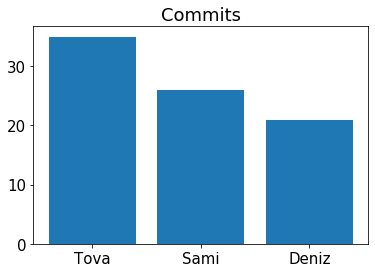

In [28]:
plot_commit()

<p><img style="float: center ; margin: 20px 20px 20px 20px; width: 60%" src="https://github.com/tgschwartz/MachineLearning_FinalProject/raw/master/tablo.JPG"> </p>

In [31]:
data = pd.read_csv('C:/Users/Cemil Turhan/Downloads/train.csv', index_col=0)

In [32]:
target = data.SalePrice

In [33]:
data = data.drop('SalePrice', axis=1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .3)

In [35]:
y_train_binned = [0 if price <= 120000 else 1 if price <= 200000 else 2 for price in y_train]
y_test_binned  = [0 if price <= 120000 else 1 if price <= 200000 else 2 for price in y_test]

In [36]:
X_train_num = pd.get_dummies(X_train, drop_first=True)
X_test_num  = pd.get_dummies(X_test, drop_first=True)

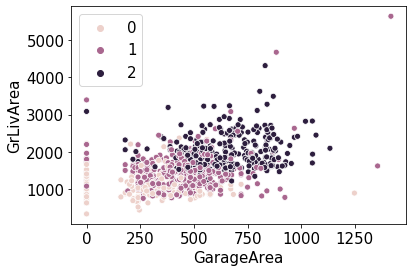

In [67]:
sns.scatterplot(X_train_num['GarageArea'], X_train_num['GrLivArea'], hue=y_train_binned)

In [ ]:
sns.scatterplot(X_train_num['GarageArea'], X_train_num['GrLivArea'], hue=y_train_binned)

In [54]:
rf=RandomForestClassifier().fit(X_train_num, y_train_binned)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [52]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
     # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

         # plot the decision surface
    x1_min, x1_max = X_train_num.iloc[:, 0].min() - 1, X_train_num.iloc[:, 0].max() + 1
    x2_min, x2_max = X_train_num.iloc[:, 1].min() - 1, X_train_num.iloc[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

         # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X_train_num[y == cl, 0],
                         y=X_train_num[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=cl,
        edgecolor='black')

In [53]:
plot_decision_regions(X_train_num, y_train_binned, classifier=rf)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.